<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PCA-Cumulative-Variance-Explained-Plots" data-toc-modified-id="PCA-Cumulative-Variance-Explained-Plots-1">PCA Cumulative Variance Explained Plots</a></span></li><li><span><a href="#PCA-Observation-Plots" data-toc-modified-id="PCA-Observation-Plots-2">PCA Observation Plots</a></span></li><li><span><a href="#PCA-Biplots" data-toc-modified-id="PCA-Biplots-3">PCA Biplots</a></span></li></ul></div>

In [1]:
library(tidyverse)
library(reshape2)
library(ggplot2)
library(plyr)
library(scales)
library(grid)
library(ggrepel)
library(factoextra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Th

In [2]:
data_dir = './data/'
#today = dt.date.today()

In [3]:
metabolomics_data_scaled = read_csv(paste(data_dir, 'autoscaled_lung_for_pca_2020-06-23.csv', sep =''), col_names = TRUE) %>% as_tibble()
#sample_types = ['Normal', '4 Hr Sham', '4 Hr AKI', '24 Hr Sham', '24 Hr AKI', '7 Day Sham', '7 Day AKI']

Parsed with column specification:
cols(
  .default = col_double(),
  Label = col_character()
)

See spec(...) for full column specifications.



In [4]:
head(metabolomics_data_scaled)

Label,Alanine,Arginine,Asparagine,Aspartate,Cysteine,Glutamate,Glutamine,Glycine,Histidine,⋯,Catechin,D-Ribitol 5-phosphate,Succinyl sulfathiazole,Thioredoxin disulfide,Pyridoxamine,N-Amidino-L-aspartate,Hydroxyacetone phosphate,trans-Homoaconitate,N-Carbamyl-L-glutamate,2-Oxo-7-methylthioheptanoic acid
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Normal,-0.3364998,-0.429141664,-1.0330094,0.003940523,-0.7734878,0.06401592,-0.81674633,-0.2617696,-0.6014984,⋯,-0.97546346,0.24938736,0.6730003,1.52658936,-0.2128951,-0.78819929,-0.68983464,-0.1655744,-0.8257752,0.1587865
Normal,0.2294501,-0.385544214,-0.6558702,-0.158761440,-0.9724790,-0.46855828,-0.58414055,-0.8131675,-0.2330162,⋯,-0.05484041,0.07882953,-0.4183617,-0.31144522,1.1039723,-0.24234398,-0.80953994,0.5649637,-1.4671586,0.5422704
Normal,-0.1532610,-0.368201612,-0.9824832,-0.056674849,-0.8507613,0.05536393,-0.84714433,-0.6109272,-0.8702195,⋯,0.22332963,0.21537426,-0.4432881,0.56244011,0.1435986,-0.90742394,-0.65075205,-1.1019196,-1.1821570,0.6565207
Normal,1.0286445,-0.009323397,0.0261742,0.372621188,0.5537390,1.03691325,-0.01312443,0.7768077,0.4576913,⋯,0.10924981,1.23947572,0.6593320,0.53696679,0.7865896,-0.29852390,0.08753756,0.7948587,-0.2546143,1.2047858
Normal,-0.8747091,-0.442199685,-1.2072606,-0.672211165,-0.9983220,-0.66641821,-1.15041751,-0.8198378,-1.0378608,⋯,-0.69538672,-0.78651349,-1.0594586,-0.24923546,-0.4790730,-0.72215198,-0.81909885,-0.7348893,-0.9276107,-0.2952449
Normal,2.0241812,1.513968385,0.3992788,2.170161928,1.0220172,2.26468196,0.57023822,1.6415140,0.8708155,⋯,0.93062805,2.10198375,1.4912791,-0.05080693,-0.4023635,-0.04622649,1.85055253,1.8161449,1.0536270,-0.6668864


In [5]:
# then use df -> R since the below is pretty awesome. 

In [6]:
# ggbiplot.r
# 
#  
#  Copyright 2011 Vincent Q. Vu.
# 
#  This program is free software; you can redistribute it and/or
#  modify it under the terms of the GNU General Public License
#  as published by the Free Software Foundation; either version 2
#  of the License, or (at your option) any later version.
#  
#  This program is distributed in the hope that it will be useful,
#  but WITHOUT ANY WARRANTY; without even the implied warranty of
#  MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
#  GNU General Public License for more details.
#  
#  You should have received a copy of the GNU General Public License
#  along with this program; if not, write to the Free Software
#  Foundation, Inc., 51 Franklin Street, Fifth Floor, Boston, MA  02110-1301, USA.
# 

#' Biplot for Principal Components using ggplot2
#'
#' @param pcobj           an object returned by prcomp() or princomp()
#' @param choices         which PCs to plot
#' @param scale           covariance biplot (scale = 1), form biplot (scale = 0). When scale = 1, the inner product between the variables approximates the covariance and the distance between the points approximates the Mahalanobis distance.
#' @param obs.scale       scale factor to apply to observations
#' @param var.scale       scale factor to apply to variables
#' @param pc.biplot       for compatibility with biplot.princomp()
#' @param groups          optional factor variable indicating the groups that the observations belong to. If provided the points will be colored according to groups
#' @param ellipse         draw a normal data ellipse for each group?
#' @param ellipse.prob    size of the ellipse in Normal probability
#' @param labels          optional vector of labels for the observations
#' @param labels.size     size of the text used for the labels
#' @param alpha           alpha transparency value for the points (0 = transparent, 1 = opaque)
#' @param circle          draw a correlation circle? (only applies when prcomp was called with scale = TRUE and when var.scale = 1)
#' @param var.axes        draw arrows for the variables?
#' @param varname.size    size of the text for variable names
#' @param varname.adjust  adjustment factor the placement of the variable names, >= 1 means farther from the arrow
#' @param varname.abbrev  whether or not to abbreviate the variable names
#'
#' @return                a ggplot2 plot
#' @export
#' @examples
#'   data(wine)
#'   wine.pca <- prcomp(wine, scale. = TRUE)
#'   print(ggbiplot(wine.pca, obs.scale = 1, var.scale = 1, groups = wine.class, ellipse = TRUE, circle = TRUE))
#'
ggbiplot <- function(pcobj, choices = 1:2, scale = 1, pc.biplot = TRUE, 
                      obs.scale = 1 - scale, var.scale = scale, 
                      groups = NULL, ellipse = FALSE, ellipse.prob = 0.68, 
                      labels = NULL, labels.size = 3, alpha = 1, 
                      var.axes = TRUE, 
                      circle = FALSE, circle.prob = 0.69, 
                      varname.size = 3, varname.adjust = 1.5, 
                      varname.abbrev = FALSE, ...)
{
  library(ggplot2)
  library(plyr)
  library(scales)
  library(grid)
  library(ggrepel)
    

  stopifnot(length(choices) == 2)

  # Recover the SVD
 if(inherits(pcobj, 'prcomp')){
    nobs.factor <- sqrt(nrow(pcobj$x) - 1)
    d <- pcobj$sdev
    u <- sweep(pcobj$x, 2, 1 / (d * nobs.factor), FUN = '*')
    v <- pcobj$rotation
  } else if(inherits(pcobj, 'princomp')) {
    nobs.factor <- sqrt(pcobj$n.obs)
    d <- pcobj$sdev
    u <- sweep(pcobj$scores, 2, 1 / (d * nobs.factor), FUN = '*')
    v <- pcobj$loadings
  } else if(inherits(pcobj, 'PCA')) {
    nobs.factor <- sqrt(nrow(pcobj$call$X))
    d <- unlist(sqrt(pcobj$eig)[1])
    u <- sweep(pcobj$ind$coord, 2, 1 / (d * nobs.factor), FUN = '*')
    v <- sweep(pcobj$var$coord,2,sqrt(pcobj$eig[1:ncol(pcobj$var$coord),1]),FUN="/")
  } else if(inherits(pcobj, "lda")) {
      nobs.factor <- sqrt(pcobj$N)
      d <- pcobj$svd
      u <- predict(pcobj)$x/nobs.factor
      v <- pcobj$scaling
      d.total <- sum(d^2)
  } else {
    stop('Expected a object of class prcomp, princomp, PCA, or lda')
  }

  # Scores
  choices <- pmin(choices, ncol(u))
  df.u <- as.data.frame(sweep(u[,choices], 2, d[choices]^obs.scale, FUN='*'))

  # Directions
  v <- sweep(v, 2, d^var.scale, FUN='*')
  df.v <- as.data.frame(v[, choices])

  names(df.u) <- c('xvar', 'yvar')
  names(df.v) <- names(df.u)

  if(pc.biplot) {
    df.u <- df.u * nobs.factor
  }

  # Scale the radius of the correlation circle so that it corresponds to 
  # a data ellipse for the standardized PC scores
  r <- sqrt(qchisq(circle.prob, df = 2)) * prod(colMeans(df.u^2))^(1/4)

  # Scale directions
  v.scale <- rowSums(v^2)
  df.v <- r * df.v / sqrt(max(v.scale))

  # Change the labels for the axes
  if(obs.scale == 0) {
    u.axis.labs <- paste('standardized PC', choices, sep='')
  } else {
    u.axis.labs <- paste('PC', choices, sep='')
  }

  # Append the proportion of explained variance to the axis labels
  u.axis.labs <- paste(u.axis.labs, 
                       sprintf('(%0.1f%% explained var.)', 
                               100 * pcobj$sdev[choices]^2/sum(pcobj$sdev^2)))

  # Score Labels
  if(!is.null(labels)) {
    df.u$labels <- labels
  }

  # Grouping variable
  if(!is.null(groups)) {
    df.u$groups <- groups
  }

  # Variable Names
  if(varname.abbrev) {
    df.v$varname <- abbreviate(rownames(v))
  } else {
    df.v$varname <- rownames(v)
  }

  # Variables for text label placement
  df.v$angle <- with(df.v, (180/pi) * atan(yvar / xvar))
  df.v$hjust = with(df.v, (1 - varname.adjust * sign(xvar)) / 2)

  # Base plot
  g <- ggplot(data = df.u, aes(x = xvar, y = yvar)) + 
          xlab(u.axis.labs[1]) + ylab(u.axis.labs[2]) + coord_equal()

  if(var.axes) {
    # Draw circle
    if(circle) 
    {
      theta <- c(seq(-pi, pi, length = 50), seq(pi, -pi, length = 50))
      circle <- data.frame(xvar = r * cos(theta), yvar = r * sin(theta))
      g <- g + geom_path(data = circle, color = muted('white'), 
                         size = 1/2, alpha = 1/3)
    }

    # Draw directions
    g <- g +
      geom_point(data = df.v,
                   aes(x = xvar, y = yvar), 
                   color = muted('red'))
  }

  # Draw either labels or points
  if(!is.null(df.u$labels)) {
    if(!is.null(df.u$groups)) {
      g <- g + geom_text(aes(label = labels, color = groups), 
                         size = labels.size)
    } else {
      g <- g + geom_text(aes(label = labels), size = labels.size)      
    }
  } else {
    if(!is.null(df.u$groups)) {
      g <- g + geom_point(aes(color = groups, shape = groups), alpha = alpha) + scale_shape_manual(values=c(0,1,2,3,4,5,6)) + scale_color_brewer(palette="Set1")
    } else {
      g <- g + geom_point(alpha = alpha)      
    }
  }

  # Overlay a concentration ellipse if there are groups
  if(!is.null(df.u$groups) && ellipse) {
    theta <- c(seq(-pi, pi, length = 50), seq(pi, -pi, length = 50))
    circle <- cbind(cos(theta), sin(theta))

    ell <- ddply(df.u, 'groups', function(x) {
      if(nrow(x) <= 2) {
        return(NULL)
      }
      sigma <- var(cbind(x$xvar, x$yvar))
      mu <- c(mean(x$xvar), mean(x$yvar))
      ed <- sqrt(qchisq(ellipse.prob, df = 2))
      data.frame(sweep(circle %*% chol(sigma) * ed, 2, mu, FUN = '+'), 
                 groups = x$groups[1])
    })
    names(ell)[1:2] <- c('xvar', 'yvar')
    g <- g + geom_path(data = ell, aes(color = groups, group = groups))
  }

  # Label the variable axes
  if(var.axes) {
    g <- g + 
    geom_text_repel(data = df.v, alpha = 0.5,
              aes(label = varname, x = xvar, y = yvar, 
                  angle = 0, hjust = hjust),
              color = 'darkred', size = varname.size, force = 2,
                   nudge_x = 1.5, segment.size = 0.1,
                   box.padding = 0.2, point.padding = 0.5)
  }
  # Change the name of the legend for groups
  # if(!is.null(groups)) {
  #   g <- g + scale_color_brewer(name = deparse(substitute(groups)), 
  #                               palette = 'Dark2')
  # }

  # TODO: Add a second set of axes

  return(g)
} # this is a derivation of the package ggbiplot with some of my own changes, namely feature vis techniques

In [7]:
organ_name <- 'Lung'

# change labels columns into factor
group_order = c('Normal', '4 Hr Sham', '4 Hr AKI', '24 Hr Sham', '24 Hr AKI', '7 Day Sham', '7 Day AKI') # order
factor_labels <- function(data_frame) {
    data_frame$Label = factor(data_frame$Label, levels = group_order, ordered = T)
    return (data_frame[order(data_frame$Label),])
}

metabolomics_data_scaled = factor_labels(metabolomics_data_scaled)

In [8]:
# perform pca on each dataframe
PCA <- function(data_frame, name_cols = c('Label')) {
    # assumes columns 1 and 2 are ID and label columns
    return (prcomp(data_frame[-(which(colnames(data_frame) %in% name_cols))], scale. = F, center = F))
}

pca <- PCA(metabolomics_data_scaled, name_cols = c('Label'))

In [9]:
# see https://stats.stackexchange.com/questions/123318/why-are-there-only-n-1-principal-components-for-n-data-if-the-number-of-dime
# for why PCA has number of samples and not number of variables when N<<P

In [10]:
# get the contributions of each PC for each dataframe
pca_importance <- function(data_frame) {
    return (summary(data_frame)$importance)
}

pca_var_exp <- pca_importance(pca)

In [11]:
pca_var_exp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65
Standard deviation,7.609643,3.86198,3.47727,2.548282,2.511485,1.955482,1.681647,1.493288,1.411156,1.353121,⋯,0.2443967,0.2172052,0.2105506,0.194615,0.1874394,0.1780824,0.1548631,0.1496465,0.1426405,3.637028e-15
Proportion of Variance,0.438690,0.11299,0.09160,0.049200,0.047780,0.028970,0.021420,0.016890,0.015090,0.013870,⋯,0.0004500,0.0003600,0.0003400,0.000290,0.0002700,0.0002400,0.0001800,0.0001700,0.0001500,0.000000e+00
Cumulative Proportion,0.438690,0.55168,0.64328,0.692480,0.740260,0.769230,0.790650,0.807550,0.822630,0.836500,⋯,0.9980100,0.9983700,0.9987000,0.998990,0.9992500,0.9994900,0.9996800,0.9998500,1.0000000,1.000000e+00


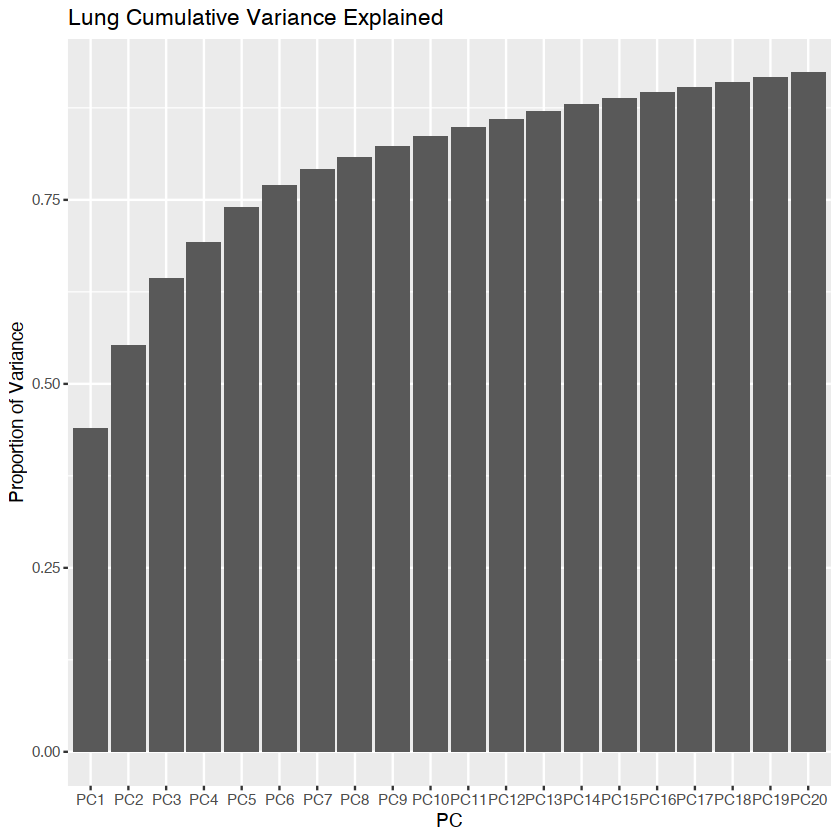

In [12]:
pca_cum_var_plots <- function(pca_imp_df) { 
    # input from the function summary(princomp_object)$importance for all organs
    # names(pca_var_exp) need to be defined to the organ names
    title = paste(names(pca_var_exp), 'Cumulative Variance Explained', sep = ' ')
    x = factor(colnames(pca_var_exp)[1:20], levels = colnames(pca_var_exp)[1:20])
    y = as.numeric(pca_var_exp[3,1:20])
    print(ggplot() + geom_bar(aes(x, y), stat="identity") + labs(title = title, x = 'PC', y = 'Proportion of Variance'))
}


# print cumulative variance explained by PCS for each organ

title = paste(organ_name, 'Cumulative Variance Explained', sep = ' ')
x = factor(colnames(pca_var_exp)[1:20], levels = colnames(pca_var_exp)[1:20])
y = as.numeric(pca_var_exp[3,1:20])
print(ggplot() + geom_bar(aes(x, y), stat="identity") + labs(title = title, x = 'PC', y = 'Proportion of Variance'))

## PCA Observation Plots

In [39]:
pca_obs_plot <- function(prin_comp_object, organ_name, labels, x_axis_pc, y_axis_pc) {
    # input: a prcomp object and the name of the organ, and the group labels of the observations (i.e 24hrAKI)
    # output:  ggplots of the two princ comp wanted to be compared
    g <- ggbiplot(prin_comp_object, choices = c(x_axis_pc,y_axis_pc), ellipse = T, groups = labels, var.axes = F) + ggtitle(paste(organ_name, 'Observations Plot: PC', x_axis_pc, 'Vs','PC', y_axis_pc, sep = ' ' ))
    ggsave(plot = g, device = 'png', filename = paste('./', organ_name, 'ObsPC', x_axis_pc, 'PC', y_axis_pc, '.png', sep = '')) # uncomment to save graphs to current wd
    return (g)
}

Saving 7 x 7 in image



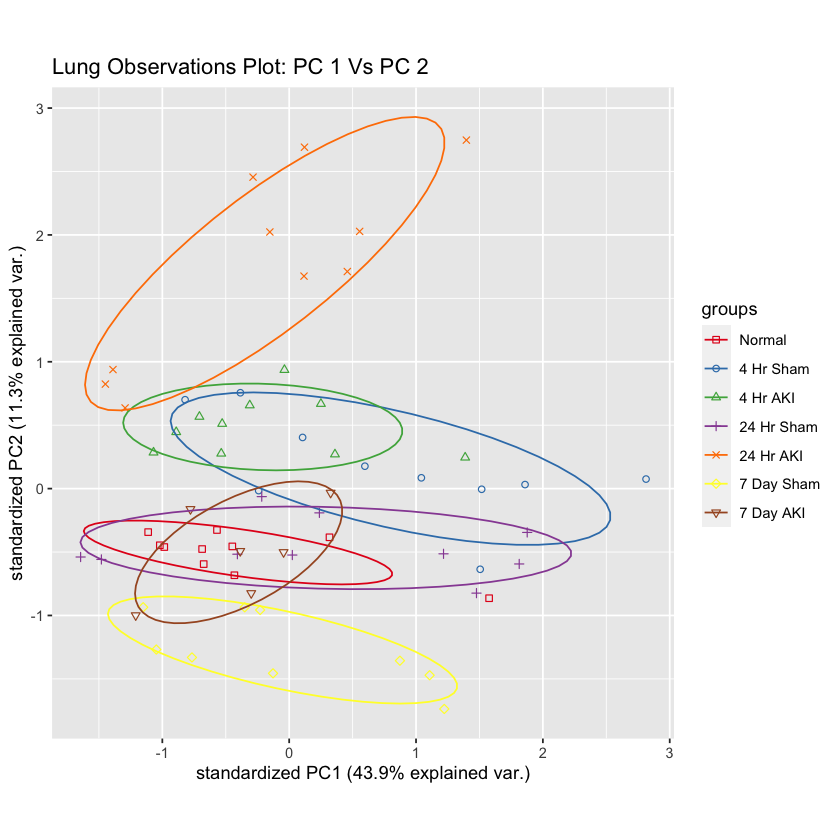

In [40]:
print(pca_obs_plot(pca, organ_name, metabolomics_data_scaled$Label, 1,2)) # PCs 1 and 2

Saving 7 x 7 in image



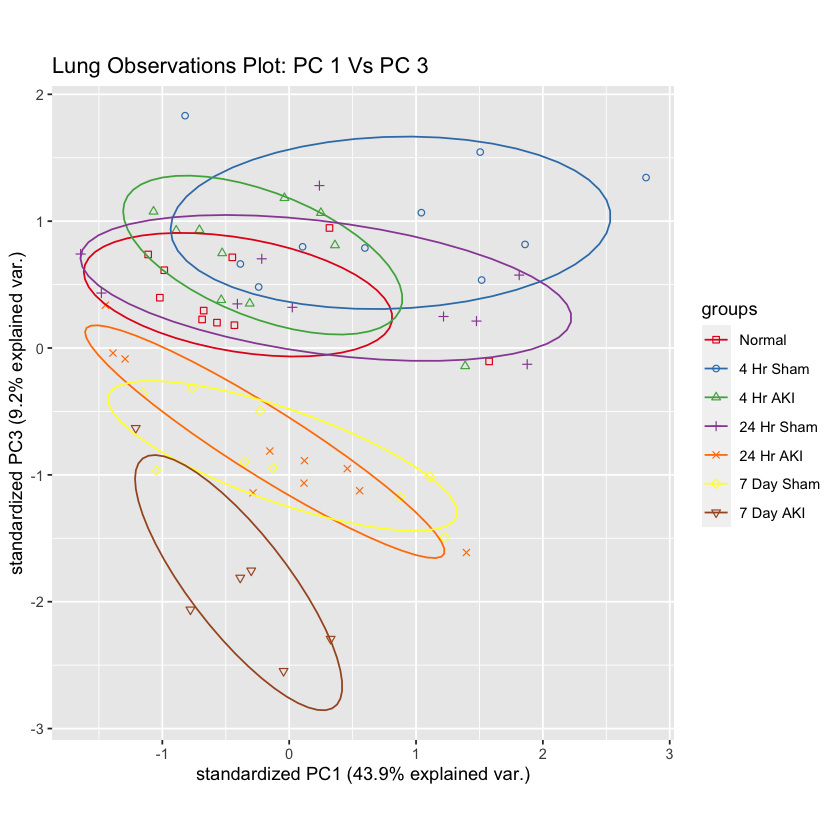

In [41]:
print(pca_obs_plot(pca, organ_name, metabolomics_data_scaled$Label, 1,3)) # PCs 1 and 3

Saving 7 x 7 in image



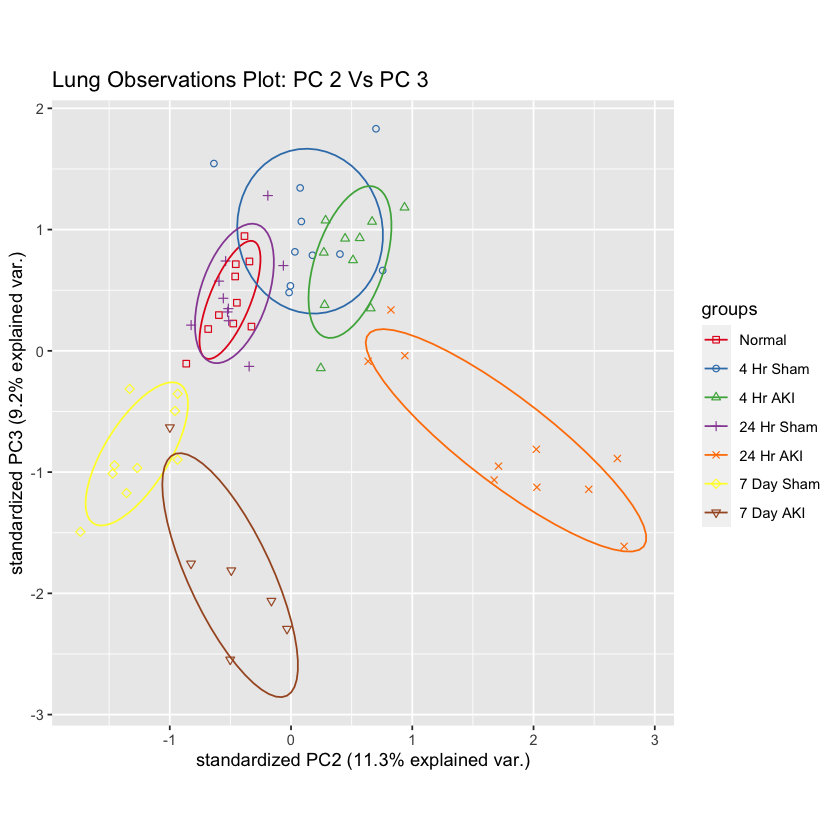

In [42]:
print(pca_obs_plot(pca, organ_name, metabolomics_data_scaled$Label, 2,3)) # PCs 2 and 3

## PCA Biplots

In [13]:
# grab the cosine squared values for each of the organs and store them in a dataframe (used for plotting sig variables in projection)
feat_imp_dfs <- get_pca_var(pca)

In [17]:
feat_imp_dfs

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

In [54]:
get_top_metabolites <- function(feat_imp_obj, x_axis_pc, y_axis_pc, top_metabolites) {
    # input: a cos2 dataframe, specifying which pcs intended to plot
    # the top_metabolites contributing to the projection between two PCs given
    temp <- feat_imp_obj$cos2[,c(x_axis_pc, y_axis_pc)]
    temp <- cbind(temp, temp[,1] + temp[,2])
    return(rownames(temp[order(temp[,3], decreasing = T),][1:top_metabolites,]))
}

pca_biplots <- function(prin_comp_object, organ_name, top_mets, labels, x_axis_pc, y_axis_pc) {
    # input: a prcomp object, the top metabolites in the projection, and the corresponding pcs to be plotted
    # ensure the top_mets matches the principal components being visualized
    # output: a PCA biplot, option to save as .png
    prin_comp_object$rotation = prin_comp_object$rotation[top_mets,]
    #rownames(prin_comp_object$rotation) <- top_mets_names # these are in the same ordered as top_mets_ids
    g <- ggbiplot(prin_comp_object, choices = c(x_axis_pc,y_axis_pc), 
             ellipse = T, groups = labels, var.axes = T, varname.size = 2.5, varname.adjust = 1.5, varname.abbrev = F) +
                ggtitle(paste(organ_name, 'Biplot: PC', x_axis_pc, 'Vs','PC', y_axis_pc, sep = ' ' ))
    ggsave(plot = g, device = 'png', filename = paste('./', organ_name, 'BiplotPC', x_axis_pc, 'PC', y_axis_pc, '.png', sep = '')) # uncomment to save graphs to current wd
    return (g)
}

Saving 7 x 7 in image



 [1] "(5-L-Glutamyl)-L-glutamine" "5-Hydroxyisourate"         
 [3] "5-Oxoproline"               "Alanine"                   
 [5] "cis-p-Coumarate"            "Citrate"                   
 [7] "Cytidine"                   "Dehydroascorbate"          
 [9] "Dimethylglycine"            "gamma-L-Glutamyl-D-alanine"
[11] "Glutamine"                  "Glutathione disulfide"     
[13] "Guanine"                    "Histidine"                 
[15] "Hydroxyacetone phosphate"   "Leucine"                   
[17] "Malate"                     "Methylenediurea"           
[19] "N-Acetylneuraminate"        "Nicotinamide"              
[21] "Phenylalanine"              "Proline"                   
[23] "Serine"                     "Threonine"                 
[25] "Tyrosine"                  


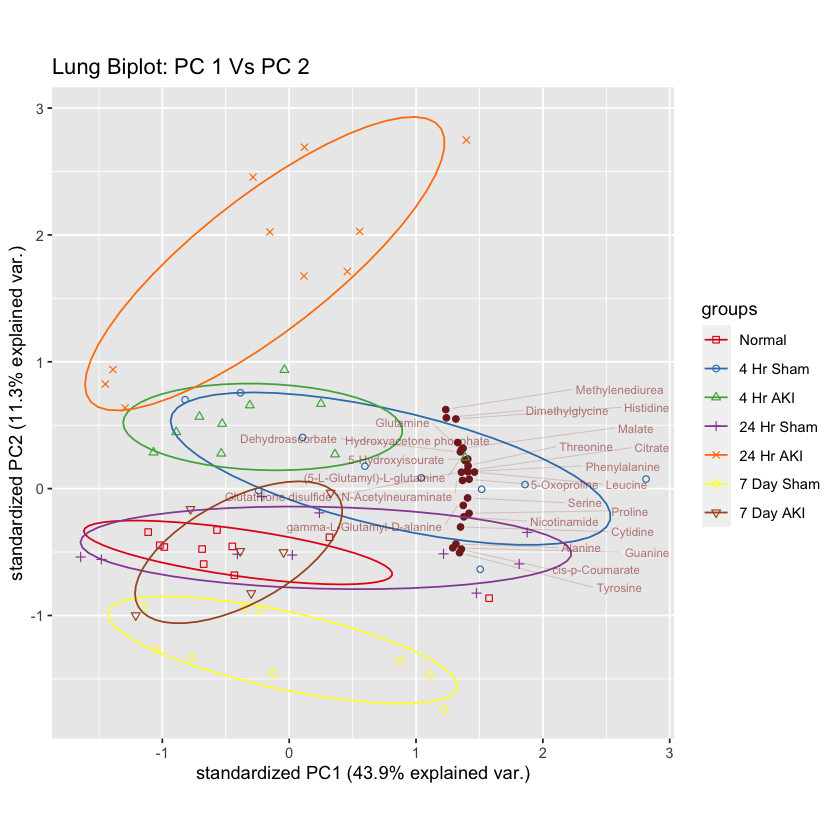

In [55]:
PCs = c(1,2)

top_metabolites <- 25 # how many metabolites do you want to use in the biplots

top_mets <- get_top_metabolites(feat_imp_dfs, PCs[1], PCs[2], top_metabolites) # returns PC 1 and PC2 top metabolites 

print(pca_biplots(pca, organ_name, 
                      top_mets, metabolomics_data_scaled$Label, PCs[1], PCs[2])) # PCs 1 and 2

print(sort(top_mets))

Saving 7 x 7 in image



 [1] "(5-L-Glutamyl)-L-glutamine" "3-Sulfino-L-alanine"       
 [3] "5-Hydroxyisourate"          "5-Oxoproline"              
 [5] "cis-p-Coumarate"            "Citrate"                   
 [7] "Cytidine"                   "Dehydroascorbate"          
 [9] "gamma-L-Glutamyl-D-alanine" "Glutamine"                 
[11] "Glutathione disulfide"      "Glycine"                   
[13] "Histidine"                  "Hydroxyacetone phosphate"  
[15] "L-Cysteate"                 "Leucine"                   
[17] "Lysine"                     "Malate"                    
[19] "N-Acetylneuraminate"        "Nicotinamide"              
[21] "Phenylalanine"              "Proline"                   
[23] "Serine"                     "Taurine"                   
[25] "Threonine"                 


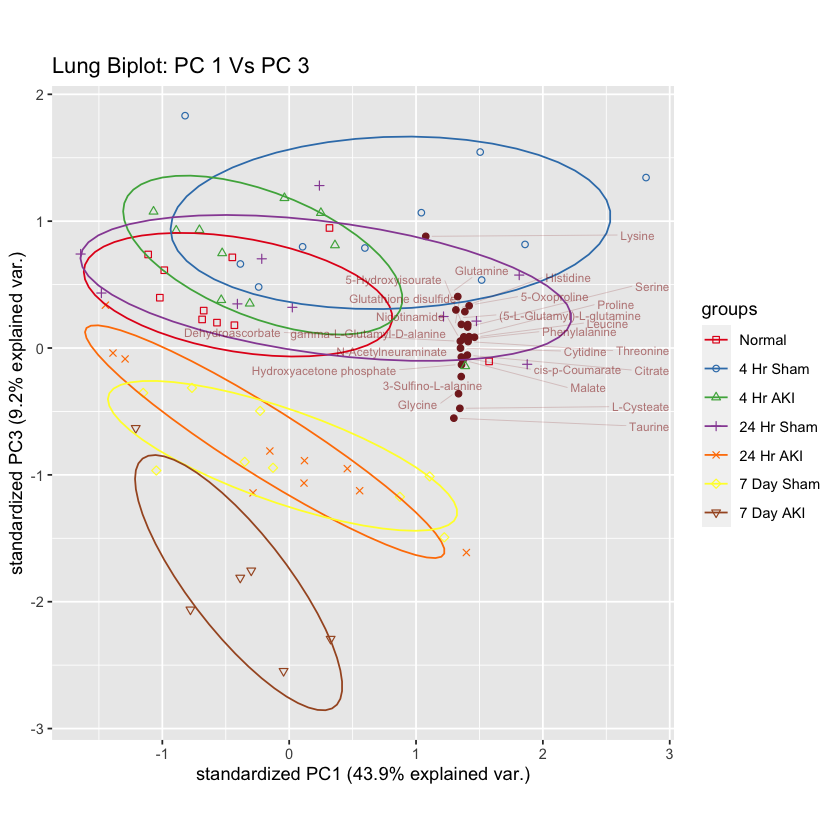

In [56]:
PCs = c(1,3)

top_metabolites <- 25 # how many metabolites do you want to use in the biplots

top_mets <- get_top_metabolites(feat_imp_dfs, PCs[1], PCs[2], top_metabolites) # returns PC 1 and PC2 top metabolites 

print(pca_biplots(pca, organ_name, 
                      top_mets, metabolomics_data_scaled$Label, PCs[1], PCs[2])) # PCs 1 and 2

print(sort(top_mets))

Saving 7 x 7 in image



 [1] "(S)(+)-Allantoin"                 "2-3-Bisphosphoglycerate"         
 [3] "2-Oxo-7-methylthioheptanoic acid" "2-Oxoglutaramate"                
 [5] "2/3-Phospho-D-glycerate"          "4-Aminobenzoate"                 
 [7] "4-Pyridoxate"                     "5-6-Dihydrothymine"              
 [9] "Aspartate"                        "Creatinine"                      
[11] "D-Glucose"                        "D-Ribose"                        
[13] "Ethanolamine phosphate"           "L-2-Aminoadipate"                
[15] "L-Arabinose"                      "N-Amidino-L-aspartate"           
[17] "N6-Methyl-L-lysine"               "O-Propanoylcarnitine"            
[19] "Ornithine"                        "Pantothenate"                    
[21] "Phosphocreatine"                  "Putrescine"                      
[23] "Pyridoxamine"                     "Serotonin"                       
[25] "Thioredoxin disulfide"           


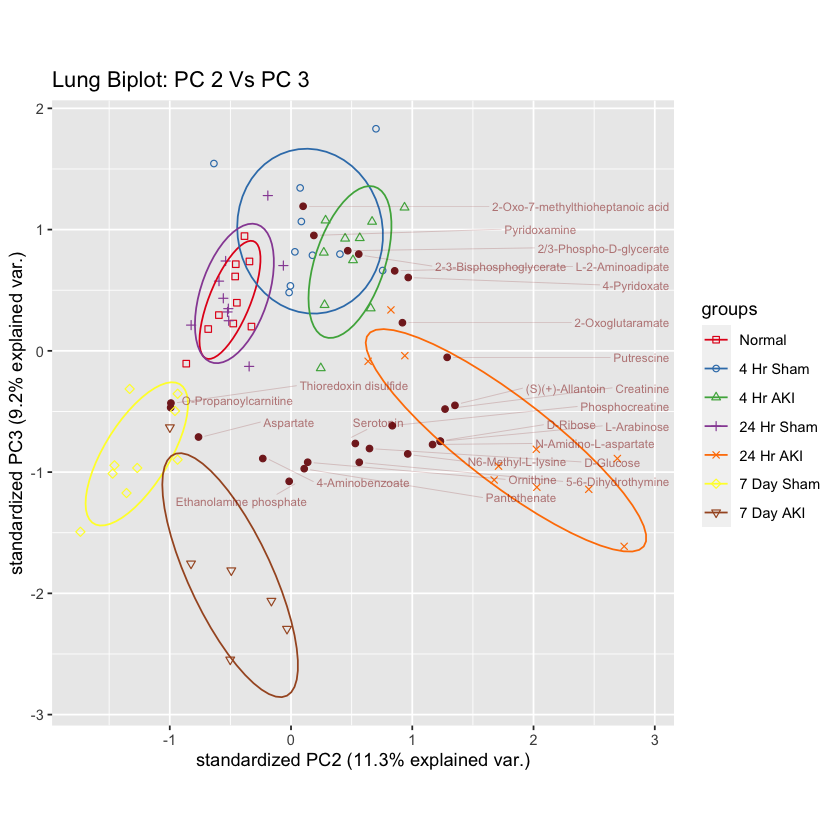

In [57]:
PCs = c(2,3)

top_metabolites <- 25 # how many metabolites do you want to use in the biplots

top_mets <- get_top_metabolites(feat_imp_dfs, PCs[1], PCs[2], top_metabolites) # returns PC 1 and PC2 top metabolites 

print(pca_biplots(pca, organ_name, 
                      top_mets, metabolomics_data_scaled$Label, PCs[1], PCs[2])) # PCs 1 and 2

print(sort(top_mets))